In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df1 = pd.read_csv('./dataset/online_retail_1.csv', encoding='unicode_escape')
df2 = pd.read_csv('./dataset/online_retail_2.csv', encoding='unicode_escape')

In [88]:
print(df1.shape)
print(df2.shape)

(525461, 8)
(541910, 8)


In [89]:
df1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1/12/09 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,1/12/09 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,1/12/09 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1/12/09 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1/12/09 07:45,1.25,13085.0,United Kingdom


In [90]:
df1['Description'].nunique()

4681

In [91]:
for c in df1.columns:
    print(f'Unique "{c}": \t{df1[c].nunique()}')

Unique "Invoice": 	28816
Unique "StockCode": 	4632
Unique "Description": 	4681
Unique "Quantity": 	825
Unique "InvoiceDate": 	25296
Unique "Price": 	1606
Unique "Customer ID": 	4383
Unique "Country": 	40


In [92]:
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'], format="%d/%m/%y %H:%M")
df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'], format="%d/%m/%y %H:%M")

In [93]:
print(f"From {min(df1['InvoiceDate'])} to {max(df1['InvoiceDate'])}")

From 2009-12-01 07:45:00 to 2010-12-09 20:01:00


In [94]:
print(f"From {min(df2['InvoiceDate'])} to {max(df2['InvoiceDate'])}")

From 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [57]:
# initially assumed that StockCode is ProductId

In [96]:
df = pd.concat([df1, df2], axis=0, ignore_index=True)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [97]:
# df1 = df.copy()
# df1['Description'] = df1['Description'].fillna('Unknown(asd)')

# stockcode_description_counts = df1.groupby('StockCode')['Description'].nunique()

# # Filter stock codes with multiple descriptions
# stockcodes_with_multiple_descriptions = stockcode_description_counts[stockcode_description_counts > 1]

# # Print stock codes with multiple descriptions and their corresponding descriptions
# for stockcode in stockcodes_with_multiple_descriptions.index:
#     descriptions = df1[df1['StockCode'] == stockcode]['Description'].unique()
#     print(f"StockCode: {str(stockcode)}, Descriptions: {', '.join(descriptions)}")

StockCode: 10002, Descriptions: INFLATABLE POLITICAL GLOBE , Unknown(asd)
StockCode: 10080, Descriptions: GROOVY CACTUS INFLATABLE, Unknown(asd), check
StockCode: 10109, Descriptions: BENDY COLOUR PENCILS, Unknown(asd)
StockCode: 10120, Descriptions: DOGGY RUBBER, Zebra invcing error
StockCode: 10123C, Descriptions: HEARTS WRAPPING TAPE , Unknown(asd)
StockCode: 10123G, Descriptions: ARMY CAMO WRAPPING TAPE, Unknown(asd)
StockCode: 10124A, Descriptions: Unknown(asd), SPOTS ON RED BOOKCOVER TAPE
StockCode: 10133, Descriptions: COLOURING PENCILS BROWN TUBE, damaged
StockCode: 10134, Descriptions: COLOURING PENCILS BROWN TUBE, Unknown(asd)
StockCode: 10138, Descriptions: ASSORTED COLOUR JUMBO PEN, Unknown(asd)
StockCode: 15030, Descriptions: FAN BLACK FRAME , Unknown(asd)
StockCode: 15036, Descriptions: ASSORTED COLOURS SILK FAN, Unknown(asd)
StockCode: 15044B, Descriptions: BLUE PAPER PARASOL , Unknown(asd)
StockCode: 15056BL, Descriptions: EDWARDIAN PARASOL BLACK, Unknown(asd)
StockCode

KeyboardInterrupt: 

In [98]:
df1 = df.copy()

stockcode_description_counts = df1.groupby('StockCode')['Description'].nunique()

# Filter stock codes with multiple descriptions
stockcodes_with_no_descriptions = stockcode_description_counts[stockcode_description_counts == 0]

# Print stock codes with no descriptions and their corresponding descriptions
for stockcode in stockcodes_with_no_descriptions.index:
    print(f"StockCode: {str(stockcode)}")

StockCode: 10124C
StockCode: 15060A
StockCode: 16065A
StockCode: 16131
StockCode: 16132
StockCode: 16155H
StockCode: 16156A
StockCode: 16161N
StockCode: 16169H
StockCode: 16195
StockCode: 16200A
StockCode: 16201C
StockCode: 16210
StockCode: 16222B
StockCode: 16240
StockCode: 16243A
StockCode: 16245B
StockCode: 16248A
StockCode: 16249B
StockCode: 16255
StockCode: 17010S
StockCode: 17013A
StockCode: 17013E
StockCode: 17014B
StockCode: 17017
StockCode: 17084F
StockCode: 17120
StockCode: 17160
StockCode: 18033
StockCode: 18094A
StockCode: 18096B
StockCode: 20690
StockCode: 20691
StockCode: 20710
StockCode: 20720
StockCode: 20743
StockCode: 20824
StockCode: 20844
StockCode: 20859
StockCode: 20880
StockCode: 20883
StockCode: 20900
StockCode: 20904
StockCode: 20911
StockCode: 20937
StockCode: 20938
StockCode: 20944
StockCode: 20946
StockCode: 20951
StockCode: 20955
StockCode: 20959
StockCode: 20965
StockCode: 20995
StockCode: 21005
StockCode: 21019
StockCode: 21020
StockCode: 21021
StockCode:

In [99]:
df[df['StockCode'] == '62095B']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
76825,496354,62095B,TURQOISE ICE CREAM SUNHAT,12,2010-02-01 09:52:00,1.69,12810.0,Japan
82547,496974,62095B,TURQOISE ICE CREAM SUNHAT,12,2010-02-05 08:53:00,1.45,14298.0,United Kingdom
114814,500336,62095B,TURQOISE ICE CREAM SUNHAT,3,2010-03-07 13:48:00,1.69,17589.0,United Kingdom
171472,505684,62095B,TURQOISE ICE CREAM SUNHAT,1,2010-04-23 16:16:00,3.36,NaN,United Kingdom
172055,505709,62095B,TURQOISE ICE CREAM SUNHAT,2,2010-04-25 12:34:00,1.69,13050.0,United Kingdom
175449,506047,62095B,TURQOISE ICE CREAM SUNHAT,7,2010-04-27 11:48:00,1.69,16782.0,United Kingdom
179741,506438,62095B,TURQOISE ICE CREAM SUNHAT,2,2010-04-29 15:42:00,1.69,NaN,United Kingdom
195782,508097,62095B,TURQOISE ICE CREAM SUNHAT,12,2010-05-13 09:33:00,1.69,12683.0,France
197411,508333,62095B,TURQOISE ICE CREAM SUNHAT,120,2010-05-14 12:00:00,0.85,13694.0,United Kingdom
198126,508464,62095B,TURQOISE ICE CREAM SUNHAT,24,2010-05-16 10:37:00,0.85,17581.0,United Kingdom


In [100]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [101]:
type(df['InvoiceDate'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [102]:
df['InvoiceDate'].dt.year.value_counts()

InvoiceDate
2010    522714
2011    499429
2009     45228
Name: count, dtype: int64

In [103]:
df[df['InvoiceDate'].dt.year == 2010]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
45228,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.0,United Kingdom
45229,C493411,21539,RETRO SPOTS BUTTER DISH,-1,2010-01-04 09:43:00,4.25,14590.0,United Kingdom
45230,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.0,United Kingdom
45231,493413,21724,PANDA AND BUNNIES STICKER SHEET,1,2010-01-04 09:54:00,0.85,NaN,United Kingdom
45232,493413,84578,ELEPHANT TOY WITH BLUE T-SHIRT,1,2010-01-04 09:54:00,3.75,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
567937,539991,21618,4 WILDFLOWER BOTANICAL CANDLES,1,2010-12-23 16:49:00,1.25,NaN,United Kingdom
567938,539991,72741,GRAND CHOCOLATECANDLE,4,2010-12-23 16:49:00,1.45,NaN,United Kingdom
567939,539992,21470,FLOWER VINE RAFFIA FOOD COVER,1,2010-12-23 17:41:00,3.75,NaN,United Kingdom
567940,539992,22258,FELT FARM ANIMAL RABBIT,1,2010-12-23 17:41:00,1.25,NaN,United Kingdom


# Cleaning 

In [104]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [113]:
df = df[df['Quantity'] > 0]
df = df.dropna(subset=['Customer ID', 'Invoice', 'StockCode'])

In [114]:
df['Customer ID'] = df['Customer ID'].astype(int)

In [115]:
df.shape

(805620, 8)

In [117]:
# df.to_csv('./dataset/online_retail_cleaned.csv')

In [118]:
df = pd.read_csv('./dataset/online_retail_cleaned.csv')

In [119]:
df['Revenue'] = df['Quantity'] * df['Price']

In [133]:
df.head()

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


In [123]:
revenue_per_customer = df.groupby('Customer ID')['Revenue'].sum().reset_index()
revenue_per_customer

,Customer ID,Revenue
0,12346,77556.46
1,12347,5633.32
2,12348,2019.40
3,12349,4428.69
4,12350,334.40
...,...,...
5876,18283,2736.65
5877,18284,461.68
5878,18285,427.00
5879,18286,1296.43


In [126]:
max(revenue_per_customer['Revenue'])

608821.65

In [127]:
min(revenue_per_customer['Revenue'])

0.0

<Axes: xlabel='Revenue', ylabel='Count'>

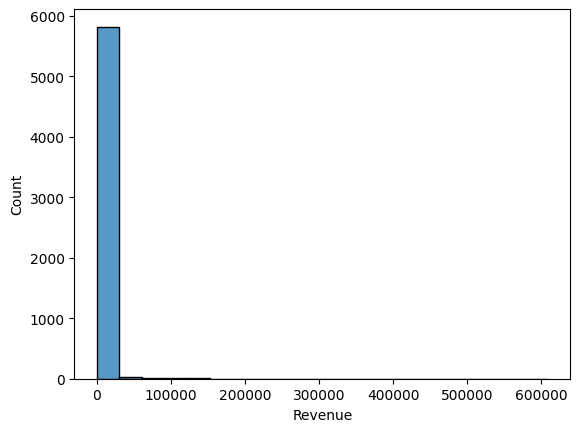

In [128]:
sns.histplot(revenue_per_customer, x='Revenue', bins=20)

In [138]:
revenue_per_customer.shape[0]//5

1176

In [131]:
revenue_per_customer.quantile(0.8)

Customer ID    17097.00
Revenue         2957.47
Name: 0.8, dtype: float64

In [132]:
revenue_per_customer.quantile(0.6)

Customer ID    15906.00
Revenue         1247.69
Name: 0.6, dtype: float64

In [140]:
revenue_per_customer.quantile(0.5)

Customer ID    15313.00
Revenue          897.62
Name: 0.5, dtype: float64

In [141]:
max(revenue_per_customer['Revenue'])/897.62

678.2621265123327

In [134]:
revenue_per_customer.quantile(0.4)

Customer ID    14719.0
Revenue          617.6
Name: 0.4, dtype: float64

In [135]:
revenue_per_customer.quantile(0.2)

Customer ID    13536.00
Revenue          289.78
Name: 0.2, dtype: float64

In [139]:
revenue_per_customer.quantile(0)

Customer ID    12346.0
Revenue            0.0
Name: 0.0, dtype: float64